In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("feature_engineering.xlsx")
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment,Household,Total_Spent,Total_Purchases,Total_Visits,Average_Purchase
0,1826,Graduation,Divorced,84835,0,0,0,189,104,379,...,1,1,0,54,173,0,1190,15,1,602.5
1,1,Graduation,Single,57091,0,0,0,464,5,64,...,5,1,0,63,174,0,577,18,5,297.5
2,10476,Graduation,Married,67267,0,1,0,134,11,59,...,2,0,0,66,207,1,251,11,2,131.0
3,1386,Graduation,Together,32474,1,1,0,10,0,1,...,7,0,0,57,31,2,11,4,7,7.5
4,5371,Graduation,Single,21474,1,0,0,6,16,24,...,7,1,0,35,124,1,91,8,7,49.5


## Feature Engineering

In [193]:
features = df.drop(columns=['ID'])
features.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment,Household,Total_Spent,Total_Purchases,Total_Visits,Average_Purchase
0,Graduation,Divorced,84835,0,0,0,189,104,379,111,...,1,1,0,54,173,0,1190,15,1,602.5
1,Graduation,Single,57091,0,0,0,464,5,64,7,...,5,1,0,63,174,0,577,18,5,297.5
2,Graduation,Married,67267,0,1,0,134,11,59,15,...,2,0,0,66,207,1,251,11,2,131.0
3,Graduation,Together,32474,1,1,0,10,0,1,0,...,7,0,0,57,31,2,11,4,7,7.5
4,Graduation,Single,21474,1,0,0,6,16,24,11,...,7,1,0,35,124,1,91,8,7,49.5


In [194]:
# Also encode Education and Marital_Status
features = pd.get_dummies(features, columns=['Education'], prefix='Education')
features = pd.get_dummies(features, columns=['Marital_Status'], prefix='Marital')
features.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow
0,84835,0,0,0,189,104,379,111,189,218,...,False,False,True,False,False,True,False,False,False,False
1,57091,0,0,0,464,5,64,7,0,37,...,False,False,True,False,False,False,False,True,False,False
2,67267,0,1,0,134,11,59,15,2,30,...,False,False,True,False,False,False,True,False,False,False
3,32474,1,1,0,10,0,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
4,21474,1,0,0,6,16,24,11,0,34,...,False,False,True,False,False,False,False,True,False,False


In [195]:
print(list(features.columns))


['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'Customer_Enrollment', 'Household', 'Total_Spent', 'Total_Purchases', 'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow']


In [196]:
features.reset_index(inplace=True)

## Logistic Regression

In [197]:
from sklearn.model_selection import train_test_split
X = features.drop(columns=['Response'], axis=1).iloc[:,1:][['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                                                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                                                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 
                                                 'Age', 'Customer_Enrollment', 'Household', 'Total_Spent', 
                                                 'Total_Purchases', 'Total_Visits', 'Average_Purchase', 
                                                 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 
                                                 'Education_Master', 'Education_PhD', 'Marital_Divorced', 
                                                 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow',
                                                 'Income']]
# X = features.drop(columns=['Response'], axis = 1)
y = features['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape
X_train.head()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Income
1265,1,1,65,112,6,92,3,9,38,2,...,False,True,False,False,False,True,False,False,False,65316
277,0,0,13,182,74,298,162,149,116,1,...,False,True,False,False,False,True,False,False,False,72940
1776,0,1,92,133,27,421,13,195,71,2,...,False,True,False,False,False,True,False,False,False,74716
358,0,0,18,163,23,424,27,65,76,1,...,False,True,False,False,True,False,False,False,False,81361
1816,0,0,94,494,92,391,194,11,241,1,...,False,True,False,False,False,False,True,False,False,85072


In [198]:
X_test.head()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Income
1259,1,1,65,30,0,9,0,0,3,2,...,False,True,False,False,False,True,False,False,False,44300
1623,0,1,83,526,28,135,10,21,99,3,...,False,True,False,False,False,False,False,True,False,62807
611,0,0,30,295,35,482,121,120,40,1,...,False,True,False,False,True,False,False,False,False,70287
514,1,2,26,733,9,180,12,19,66,11,...,False,False,False,True,False,True,False,False,False,75283
413,0,0,20,1000,155,379,224,17,120,1,...,False,True,False,False,False,False,True,False,False,61839


In [199]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [200]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Hyperparameter Optimization

In [201]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lg,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='precision')

In [202]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7104


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10)
GridSearch CV score on test set: 0.2802


In [203]:
lg =grid_search.best_estimator_
lg.fit(X_train, y_train)

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [204]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
lg_pred_train = lg.predict(X_train)
lg_pred_test = lg.predict(X_test)
lg_acc = accuracy_score(y_test, lg_pred_test)
lg_prec = precision_score(y_test, lg_pred_test)
lg_rec = recall_score(y_test, lg_pred_test)
lg_f1 = f1_score(y_test, lg_pred_test)
lg_auc = roc_auc_score(y_test, lg_pred_test)
print("Logistic Regression Accuracy: %.4f" % lg_acc)
print("Logistic Regression Precision: %.4f" % lg_prec)
print("Logistic Regression Recall: %.4f" % lg_rec)
print("Logistic Regression F1: %.4f" % lg_f1)
print("Logistic Regression AUC: %.4f" % lg_auc)

lg_prec_train = precision_score(y_train, lg_pred_train)
lg_prec_test = precision_score(y_test, lg_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(lg_prec_train))
print('Test set score: {:.4f}'.format(lg_prec_test))

Logistic Regression Accuracy: 0.7036
Logistic Regression Precision: 0.2802
Logistic Regression Recall: 0.7250
Logistic Regression F1: 0.4042
Logistic Regression AUC: 0.7126
Training set score: 0.7120
Test set score: 0.2802


In [205]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg, X_train, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) # lower CV score = does not result in improved performance

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Cross-validation scores:[0.71551724 0.68141593 0.70642202 0.70175439 0.74666667]
Average cross-validation score: 0.7104


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix

 [[348 149]
 [ 22  58]]

True Positives(TP) =  348

True Negatives(TN) =  58

False Positives(FP) =  149

False Negatives(FN) =  22


<Axes: >

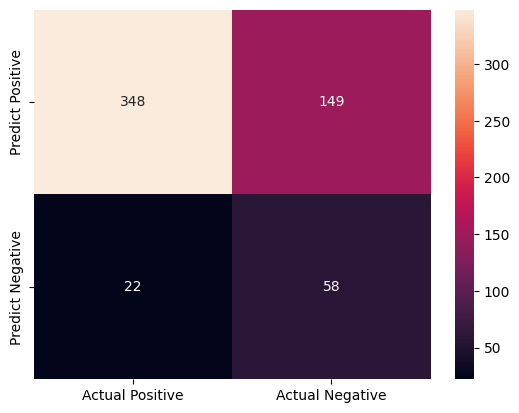

In [206]:
from sklearn.metrics import confusion_matrix
lg_cm = confusion_matrix(y_test, lg_pred_test)
print('Confusion matrix\n\n', lg_cm)
print('\nTrue Positives(TP) = ', lg_cm[0,0])
print('\nTrue Negatives(TN) = ', lg_cm[1,1])
print('\nFalse Positives(FP) = ', lg_cm[0,1])
print('\nFalse Negatives(FN) = ', lg_cm[1,0])
cm_matrix = pd.DataFrame(data=lg_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Naive Bayes

In [207]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [208]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred_test)
nb_prec = precision_score(y_test, nb_pred_test)
nb_rec = recall_score(y_test, nb_pred_test)
nb_f1 = f1_score(y_test, nb_pred_test)
nb_auc = roc_auc_score(y_test, nb_pred_test)
print("Naive Bayes Accuracy: %.4f" % nb_acc)
print("Naive Bayes Precision: %.4f" % nb_prec)
print("Naive Bayes Recall: %.4f" % nb_rec)
print("Naive Bayes F1: %.4f" % nb_f1)
print("Naive Bayes AUC: %.4f" % nb_auc)

nb_prec_train = precision_score(y_train, nb_pred_train)
nb_prec_test = precision_score(y_test, nb_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(nb_prec_train))
print('Test set score: {:.4f}'.format(nb_prec_test))

Naive Bayes Accuracy: 0.7036
Naive Bayes Precision: 0.2458
Naive Bayes Recall: 0.5500
Naive Bayes F1: 0.3398
Naive Bayes AUC: 0.6392
Training set score: 0.6738
Test set score: 0.2458


In [209]:
scores = cross_val_score(nb, X_train, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) 

Cross-validation scores:[0.67       0.64824121 0.67980296 0.66666667 0.68041237]
Average cross-validation score: 0.6690


Confusion matrix

 [[379 118]
 [ 39  41]]

True Positives(TP) =  379

True Negatives(TN) =  41

False Positives(FP) =  118

False Negatives(FN) =  39


<Axes: >

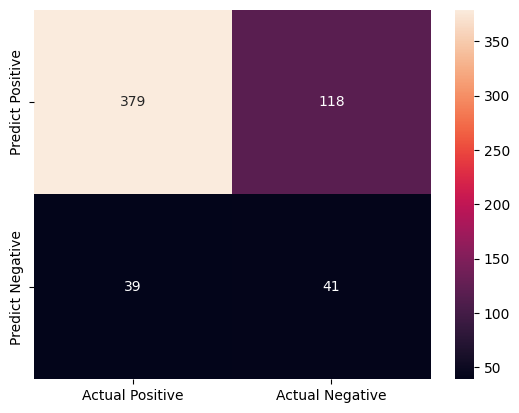

In [210]:
nb_cm = confusion_matrix(y_test, nb_pred_test)
print('Confusion matrix\n\n', nb_cm)
print('\nTrue Positives(TP) = ', nb_cm[0,0])
print('\nTrue Negatives(TN) = ', nb_cm[1,1])
print('\nFalse Positives(FP) = ', nb_cm[0,1])
print('\nFalse Negatives(FN) = ', nb_cm[1,0])
cm_matrix = pd.DataFrame(data=nb_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Decision Trees

In [211]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

## HyperParameter Optimization

In [212]:
# Define the parameter grid to search
parameters = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(estimator = dt,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [213]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.8793


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Estimator that was chosen by the search : 

 DecisionTreeClassifier()
GridSearch CV score on test set: 0.3415


In [214]:
dt = grid_search.best_estimator_
dt.fit(X_train,y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred_test)
dt_prec = precision_score(y_test, dt_pred_test)
dt_rec = recall_score(y_test, dt_pred_test)
dt_f1 = f1_score(y_test, dt_pred_test)
dt_auc = roc_auc_score(y_test, dt_pred_test)
print("Decision Trees Accuracy: %.4f" % dt_acc)
print("Decision Trees Precision: %.4f" % dt_prec)
print("Decision Trees Recall: %.4f" % dt_rec)
print("Decision Trees F1: %.4f" % dt_f1)
print("Decision Trees AUC: %.4f" % dt_auc)

dt_prec_train = precision_score(y_train, dt_pred_train)
dt_prec_test = precision_score(y_test, dt_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(dt_prec_train))
print('Test set score: {:.4f}'.format(dt_prec_test))

Decision Trees Accuracy: 0.8198
Decision Trees Precision: 0.3667
Decision Trees Recall: 0.4125
Decision Trees F1: 0.3882
Decision Trees AUC: 0.6489
Training set score: 0.9930
Test set score: 0.3667


Confusion matrix

 [[440  57]
 [ 47  33]]

True Positives(TP) =  440

True Negatives(TN) =  33

False Positives(FP) =  57

False Negatives(FN) =  47


<Axes: >

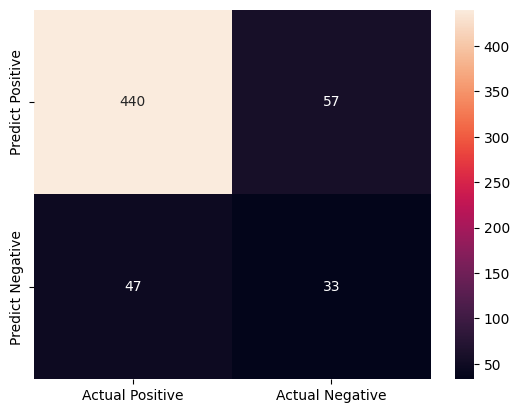

In [215]:
dt_cm = confusion_matrix(y_test, dt_pred_test)
print('Confusion matrix\n\n', dt_cm)
print('\nTrue Positives(TP) = ', dt_cm[0,0])
print('\nTrue Negatives(TN) = ', dt_cm[1,1])
print('\nFalse Positives(FP) = ', dt_cm[0,1])
print('\nFalse Negatives(FN) = ', dt_cm[1,0])
cm_matrix = pd.DataFrame(data=dt_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## K-Nearest Neighbors

In [216]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## HyperParameter Optimization

In [217]:
def compute_optimal_n_neighbors(X, y, n_neighbors_range, cv=5, scoring='precision'):
    mean_scores = []
    for n_neighbors in n_neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(knn, X, y, cv=cv, scoring=scoring)
        mean_scores.append(np.mean(scores))
    optimal_n_neighbors = n_neighbors_range[np.argmax(mean_scores)]
    return optimal_n_neighbors, mean_scores
optimal_n_neighbors, mean_scores = compute_optimal_n_neighbors(X_train, y_train, n_neighbors_range=[3, 5, 7, 9, 11])
print("Optimal number of neighbors:", optimal_n_neighbors)
print("Mean cross-validation scores:", mean_scores)

Optimal number of neighbors: 3
Mean cross-validation scores: [0.7952219862854123, 0.7353008424285019, 0.7144354441516433, 0.696263807756543, 0.6837710072190412]


In [218]:
# Define the parameter grid to search
parameters = {
    'n_neighbors': [optimal_n_neighbors],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric used for the tree
}
grid_search = GridSearchCV(estimator = knn,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [219]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.8066


Parameters that give the best results : 

 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
GridSearch CV score on test set: 0.2714


In [220]:
knn = grid_search.best_estimator_
knn.fit(X_train,y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred_test)
knn_prec = precision_score(y_test, knn_pred_test)
knn_rec = recall_score(y_test, knn_pred_test)
knn_f1 = f1_score(y_test, knn_pred_test)
knn_auc = roc_auc_score(y_test, knn_pred_test)
print("k-Nearest Neighbors Accuracy: %.4f" % knn_acc)
print("k-Nearest Neighbors Precision: %.4f" % knn_prec)
print("k-Nearest Neighbors Recall: %.4f" % knn_rec)
print("k-Nearest Neighbors F1: %.4f" % knn_f1)
print("k-Nearest Neighbors AUC: %.4f" % knn_auc)

knn_prec_train = precision_score(y_train, knn_pred_train)
knn_prec_test = precision_score(y_test, knn_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(knn_prec_train))
print('Test set score: {:.4f}'.format(knn_prec_test))

k-Nearest Neighbors Accuracy: 0.7504
k-Nearest Neighbors Precision: 0.2714
k-Nearest Neighbors Recall: 0.4750
k-Nearest Neighbors F1: 0.3455
k-Nearest Neighbors AUC: 0.6349
Training set score: 0.9930
Test set score: 0.2714


Confusion matrix

 [[395 102]
 [ 42  38]]

True Positives(TP) =  395

True Negatives(TN) =  38

False Positives(FP) =  102

False Negatives(FN) =  42


<Axes: >

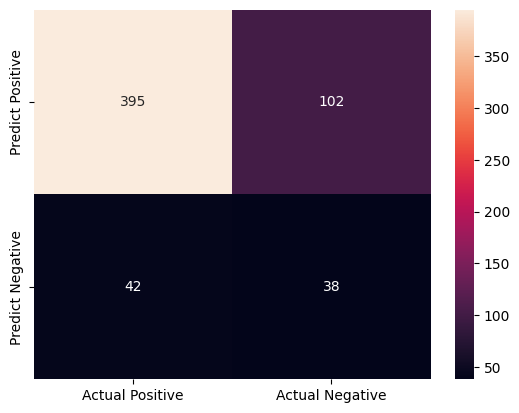

In [221]:
knn_cm = confusion_matrix(y_test, knn_pred_test)
print('Confusion matrix\n\n', knn_cm)
print('\nTrue Positives(TP) = ', knn_cm[0,0])
print('\nTrue Negatives(TN) = ', knn_cm[1,1])
print('\nFalse Positives(FP) = ', knn_cm[0,1])
print('\nFalse Negatives(FN) = ', knn_cm[1,0])
cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Support Vector Machines

In [222]:
from sklearn.svm import SVC
svm=SVC() 
svm.fit(X_train,y_train)

SVC()

## Hyperparameter Optimization

In [223]:
from sklearn.metrics import make_scorer
# param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
#                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
#                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
#               ]
# grid_search = GridSearchCV(estimator = svm,  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)
# grid_search.fit(X_train, y_train)



scorer = make_scorer(precision_score, average='binary', zero_division=0)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}

# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [1, 0.1, 0.01, 0.001], 
#     'kernel': ['linear', 'rbf'] 
# }
grid_search = GridSearchCV(estimator=svm, scoring=scorer, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring=make_scorer(precision_score, response_method='predict', average=binary, zero_division=0))

In [224]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.9938


Parameters that give the best results : 

 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=0.1, gamma=0.1)
GridSearch CV score on test set: 0.0000


In [225]:
# svm = grid_search.best_estimator_
svm = SVC()
svm.fit(X_train,y_train)
svm_pred_train = svm.predict(X_train)
svm_pred_test = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred_test)
svm_prec = precision_score(y_test, svm_pred_test)
svm_rec = recall_score(y_test, svm_pred_test)
svm_f1 = f1_score(y_test, svm_pred_test)
svm_auc = roc_auc_score(y_test, svm_pred_test)
print("Support Vector Machines Accuracy: %.4f" % svm_acc)
print("Support Vector Machines Precision: %.4f" % svm_prec)
print("Support Vector Machines Recall: %.4f" % svm_rec)
print("Support Vector Machines F1: %.4f" % svm_f1)
print("Support Vector Machines AUC: %.4f" % svm_auc)

svm_prec_train = precision_score(y_train, svm_pred_train)
svm_prec_test = precision_score(y_test, svm_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(svm_prec_train))
print('Test set score: {:.4f}'.format(svm_prec_test))

Support Vector Machines Accuracy: 0.7626
Support Vector Machines Precision: 0.2683
Support Vector Machines Recall: 0.4125
Support Vector Machines F1: 0.3251
Support Vector Machines AUC: 0.6157
Training set score: 0.6880
Test set score: 0.2683


Confusion matrix

 [[407  90]
 [ 47  33]]

True Positives(TP) =  407

True Negatives(TN) =  33

False Positives(FP) =  90

False Negatives(FN) =  47


<Axes: >

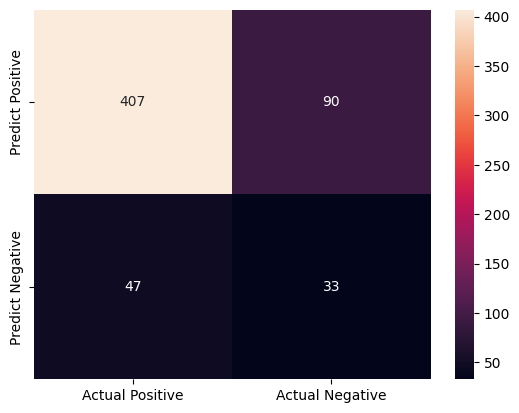

In [226]:
svm_cm = confusion_matrix(y_test, svm_pred_test)
print('Confusion matrix\n\n', svm_cm)
print('\nTrue Positives(TP) = ', svm_cm[0,0])
print('\nTrue Negatives(TN) = ', svm_cm[1,1])
print('\nFalse Positives(FP) = ', svm_cm[0,1])
print('\nFalse Negatives(FN) = ', svm_cm[1,0])
cm_matrix = pd.DataFrame(data=svm_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')